In [133]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from scipy.stats import entropy
from imblearn.over_sampling import SMOTE

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

pwd = '/Users/harlanhutton/Documents/spotify/'

In [32]:
df = pd.read_csv(pwd+'data.csv')
data = df.drop(columns = ['Track', 'Track ID', 'Artist','Artist ID'])

In [54]:
# scaling data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Playlisted',1)), columns = data.drop('Playlisted',1).columns)
data_scaled['Playlisted'] = data['Playlisted']

X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop('Playlisted',1), data_scaled['Playlisted'], test_size=0.2, random_state=42)
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


In [157]:
models = [LogisticRegression(),SVC(probability = True), GaussianNB(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), GradientBoostingClassifier()]

def plot_roc_curve(models, resampling):
    fpr = []
    tpr = []
    auc = []
    acc = []
    recall = []
    precision = []
    
    for model in models:
        
        if resampling == 0:
            mod = model.fit(X_train, y_train)
        if resampling == 1:
            mod = model.fit(X_train_res, y_train_res)
            
        preds = mod.predict_proba(X_test)[:,1]
        this_fpr,this_tpr,thresh = roc_curve(y_test, preds)
        auc.append( metrics.roc_auc_score(y_test, preds) )
        fpr.append( this_fpr )
        tpr.append( this_tpr )
        acc.append(metrics.accuracy_score(y_test, mod.predict(X_test)))
        recall.append(metrics.recall_score(y_test,mod.predict(X_test) ))
        precision.append(metrics.precision_score(y_test, mod.predict(X_test), zero_division = 0))
        plt.plot(this_fpr,this_tpr, label = mod)
    plt.plot([0,1],[0,1], 'b--', label = 'Random Chance')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();
    
    df = pd.DataFrame(models, columns = ['Model'])
    df['Accuracy'],df['AUC'],df['Recall'],df['Precision'] = acc,auc,recall,precision
    return df
    

,Model,Accuracy,AUC,Recall,Precision
0,LogisticRegression(),0.623377,0.708721,0.7500,0.126316
1,SVC(probability=True),0.787879,0.668895,0.3750,0.133333
2,GaussianNB(),0.502165,0.714535,0.8125,0.104000
3,"(DecisionTreeClassifier(max_features='auto', r...",0.887446,0.481395,0.1250,0.142857
4,DecisionTreeClassifier(),0.766234,0.527326,0.2500,0.086957
5,KNeighborsClassifier(),0.679654,0.609593,0.3125,0.073529
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.805195,0.518023,0.1875,0.085714


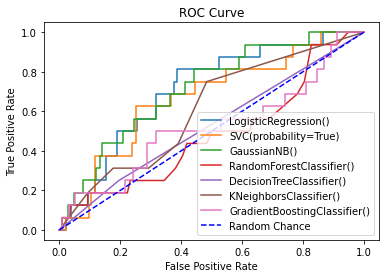

In [158]:
plot_roc_curve(models,1)

,Model,Accuracy,AUC,Recall,Precision
0,LogisticRegression(),0.930736,0.668023,0.0000,0.000000
1,SVC(probability=True),0.930736,0.543605,0.0000,0.000000
2,GaussianNB(),0.753247,0.706686,0.5625,0.152542
3,"(DecisionTreeClassifier(max_features='auto', r...",0.930736,0.484884,0.0000,0.000000
4,DecisionTreeClassifier(),0.878788,0.558866,0.1875,0.166667
5,KNeighborsClassifier(),0.926407,0.451163,0.0000,0.000000
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.930736,0.487209,0.0000,0.000000


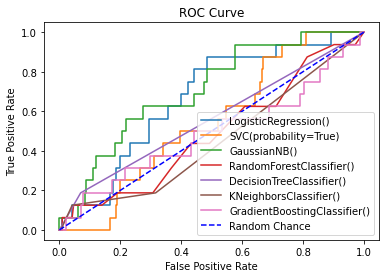

In [159]:
plot_roc_curve(models,0)